1. Klasa Neuron (nastawienie, liczenie NET, rodzaj neuronu)
2. Klasa Dane 
3. Dane odczytac z pliku
4. Mechanizm zaladowania danych, klasyfikacja, ucznia

- > Unipolarny tempo_uczenia = 1, stala = 1

- > Przechodzimy po kazdej danej treningowej, dokonujemy klasyfikacji, weryfikujemy czy poprawna klasa, jesli tak,
    przechodzimy dalej, jesli nie uczymy az do skutku.
    Calosc procesu ucznia wykonujemy tak dlugo, az wszystkie dane zostana dobrze sklasyfikowane bez zadnego kroku ucznia

In [1]:
class Dane:
    extensja = list()
    def __init__(self, linia):
        dane = linia.strip().split(';')
        self.x = int(dane[0])
        self.y = int(dane[1])
        self.klasa = int(dane[2])
        self.nowa_waga = 0
        self.net = 0
        self.nowa_klasa = 0
        Dane.extensja.append(self)
    
class Neuron:
    def __init__(self, nastawienie, tempo_ucznia):
        self.nastawienie = nastawienie
        self.tempo_ucznia = tempo_ucznia
        self.stala = 1
    
    def licz_net(self,x,y):
        net = sum([x * y, self.stala * y])
        nowa_klasa = 0
        
        if net > 0:
            nowa_klasa = 1
        else:
            nowa_klasa = 0
        return net, nowa_klasa
    
    def licznie_wagi(self, waga_stara, oczekiwana, otrzymana, wejscie):
        waga_nowa = waga_stara + self.tempo_ucznia *(oczekiwana - otrzymana) * wejscie
        return waga_nowa

    

def zaladuj_dane(plik):
    with open(plik) as f:
        f.readline()
        for linia in f.readlines():
            Dane(linia)
            
            
zaladuj_dane('zad1.txt')
neuron = Neuron('down', 1)

for d in Dane.extensja:
    d.net, d.nowa_klasa = neuron.licz_net(d.x, d.y)
    if d.nowa_klasa != d.klasa:
        while True:
            d.y =  neuron.licznie_wagi(d.y, d.klasa, d.nowa_klasa, d.x)
            d.net, d.nowa_klasa = neuron.licz_net(d.x, d.y)
            if d.nowa_klasa == d.klasa: break
                
                

                



## Jeden neuron

In [2]:
# od prowadzacego
import random as r

class Obserwacja:
    ekstencja = list()
 
    def __init__(self, data):
        dane = data.strip().split(';')
        self.x = int(dane[0])
        self.y = int(dane[1])
        self.oczekiwana = int(dane[2])
        Obserwacja.ekstencja.append(self)
 
    def __str__(self):
        return f'X: {self.x}, Y: {self.y}, Dec: {self.oczekiwana}'
 
    @classmethod
    def import_from_file(cls, nazwa_pliku):
        f = open(nazwa_pliku, 'r')
        f.readline()
        dane = f.readlines()
        for dana in dane:
            Obserwacja(dana)



class Neuron:
    def __init__(self):
        self.w1 = r.randint(-2,2)
        self.w2 = r.randint(-2, 2)
        self.w3 = r.randint(-2,2)
        self.rodzaj_neuronu = 'u'
        self.nastawienie_pozytywne = False
        self.tempo_uczenia = 1
 
    def zaladuj_dana(self, obserwacja):
        self.bierzaca_dana = obserwacja
 
    def oblicz_NET(self):
        self.net = self.w1 * self.bierzaca_dana.x + self.w2 * self.bierzaca_dana.y + self.w3 * 1
 
    def oblicz_decyzja(self):
        if self.rodzaj_neuronu == 'bi':
            if self.nastawienie_pozytywne:
                if self.net >= 0:
                    self.decyzja = 1
                else:
                    self.decyzja = -1
            else:
                if self.net > 0:
                    self.decyzja = 1
                else:
                    self.decyzja = -1
        else:
            if self.nastawienie_pozytywne:
                if self.net >= 0:
                    self.decyzja = 1
                else:
                    self.decyzja = 0
            else:
                if self.net > 0:
                    self.decyzja = 1
                else:
                    self.decyzja = 0
 
    def korekta_wag(self):
        self.w1 += self.tempo_uczenia * (self.bierzaca_dana.oczekiwana - self.decyzja) * self.bierzaca_dana.x
        self.w2 += self.tempo_uczenia * (self.bierzaca_dana.oczekiwana - self.decyzja) * self.bierzaca_dana.y
        self.w3 += self.tempo_uczenia * (self.bierzaca_dana.oczekiwana - self.decyzja) * 1
 
    def __str__(self):
        return f'W1: {self.w1}, W2: {self.w2}, W3: {self.w3}'

    
Obserwacja.import_from_file('zad2.txt')    
neuron = Neuron()
klasyfikacja = 1

 
while klasyfikacja:
    klasyfikacja = 0
    for obs in Obserwacja.ekstencja:
        neuron.zaladuj_dana(obs)
        neuron.oblicz_NET()
        neuron.oblicz_decyzja()
        while neuron.decyzja != obs.oczekiwana:
            klasyfikacja += 1
            neuron.korekta_wag()
            neuron.oblicz_NET()
            neuron.oblicz_decyzja()
        print(obs, 'klasyfikacja', klasyfikacja)
    print()

    
print('sprawdzenie')
for obs in Obserwacja.ekstencja:
    neuron.zaladuj_dana(obs)
    neuron.oblicz_NET()
    neuron.oblicz_decyzja()
    print(obs, neuron.decyzja)
    
print('wagi')   
print(neuron)


X: 1, Y: 3, Dec: 1 klasyfikacja 0
X: 2, Y: 3, Dec: 1 klasyfikacja 0
X: 6, Y: 1, Dec: 0 klasyfikacja 1
X: 1, Y: 1, Dec: 0 klasyfikacja 1
X: 3, Y: -2, Dec: 0 klasyfikacja 1
X: 1, Y: 2, Dec: 1 klasyfikacja 2
X: 5, Y: -3, Dec: 0 klasyfikacja 2
X: -1, Y: -1, Dec: 0 klasyfikacja 2
X: -1, Y: -3, Dec: 0 klasyfikacja 2
X: -2, Y: 1, Dec: 1 klasyfikacja 2
X: -3, Y: 0, Dec: 1 klasyfikacja 2
X: -3, Y: -7, Dec: 0 klasyfikacja 2
X: -3, Y: -1, Dec: 1 klasyfikacja 2

X: 1, Y: 3, Dec: 1 klasyfikacja 0
X: 2, Y: 3, Dec: 1 klasyfikacja 0
X: 6, Y: 1, Dec: 0 klasyfikacja 0
X: 1, Y: 1, Dec: 0 klasyfikacja 0
X: 3, Y: -2, Dec: 0 klasyfikacja 0
X: 1, Y: 2, Dec: 1 klasyfikacja 0
X: 5, Y: -3, Dec: 0 klasyfikacja 0
X: -1, Y: -1, Dec: 0 klasyfikacja 0
X: -1, Y: -3, Dec: 0 klasyfikacja 0
X: -2, Y: 1, Dec: 1 klasyfikacja 0
X: -3, Y: 0, Dec: 1 klasyfikacja 0
X: -3, Y: -7, Dec: 0 klasyfikacja 0
X: -3, Y: -1, Dec: 1 klasyfikacja 0

sprawdzenie
X: 1, Y: 3, Dec: 1 1
X: 2, Y: 3, Dec: 1 1
X: 6, Y: 1, Dec: 0 0
X: 1, Y: 1, Dec

   - > ## 2 neurony
    - pierwszy neuron jest unipolarny nastawiony pozytywnie
    - drugi neuron jest bipolarny i jest nastawiony negatywnie
    

In [14]:
import random as r

class Obserwacja:
    ekstencja = list()
    def __init__(self, data):
        dane = data.strip().split(';')
        self.x = int(dane[0])
        self.y = int(dane[1])
        self.oczekiwana1 = int(dane[2])
        self.oczekiwana2 = int(dane[3])
        Obserwacja.ekstencja.append(self)
 
    def __str__(self):
        return f'X: {self.x}, Y: {self.y}, Dec1: {self.oczekiwana1}, Dec2: {self.oczekiwana2}'
 
    @classmethod
    def import_from_file(cls, nazwa_pliku):
        f = open(nazwa_pliku, 'r')
        f.readline()
        dane = f.readlines()
        for dana in dane:
            Obserwacja(dana)

Obserwacja.import_from_file('zad3.txt')

for obs in Obserwacja.ekstencja:
    print(obs)
    
print()


class Neuron:
    def __init__(self, rodzaj_neuronu, nastawienie_pozytywne):
        self.w1 = r.randint(-2,2)
        self.w2 = r.randint(-2, 2)
        self.w3 = r.randint(-2,2)
        self.rodzaj_neuronu = rodzaj_neuronu
        self.nastawienie_pozytywne = nastawienie_pozytywne
        self.tempo_uczenia = 1
 
    def zaladuj_dana(self, obserwacja):
        self.bierzaca_dana = obserwacja
 
    def oblicz_NET(self):
        self.net = self.w1 * self.bierzaca_dana.x + self.w2 * self.bierzaca_dana.y + self.w3 * 1
 
    def oblicz_decyzja(self):
        if self.rodzaj_neuronu == 'bi':
            if self.nastawienie_pozytywne:
                if self.net >= 0:
                    self.decyzja = 1
                else:
                    self.decyzja = -1
            else:
                if self.net > 0:
                    self.decyzja = 1
                else:
                    self.decyzja = -1
        else:
            if self.nastawienie_pozytywne:
                if self.net >= 0:
                    self.decyzja = 1
                else:
                    self.decyzja = 0
            else:
                if self.net > 0:
                    self.decyzja = 1
                else:
                    self.decyzja = 0
 
    def korekta_wag(self, oczekiwana):
        if oczekiwana == 1:
            self.w1 += self.tempo_uczenia * (self.bierzaca_dana.oczekiwana1 - self.decyzja) * self.bierzaca_dana.x
            self.w2 += self.tempo_uczenia * (self.bierzaca_dana.oczekiwana1 - self.decyzja) * self.bierzaca_dana.y
            self.w3 += self.tempo_uczenia * (self.bierzaca_dana.oczekiwana1 - self.decyzja) * 1
        if oczekiwana == 2:
            self.w1 += self.tempo_uczenia * (self.bierzaca_dana.oczekiwana2 - self.decyzja) * self.bierzaca_dana.x
            self.w2 += self.tempo_uczenia * (self.bierzaca_dana.oczekiwana2 - self.decyzja) * self.bierzaca_dana.y
            self.w3 += self.tempo_uczenia * (self.bierzaca_dana.oczekiwana2 - self.decyzja) * 1
 
    def __str__(self):
        return f'W1: {self.w1}, W2: {self.w2}, W3: {self.w3}'
    

U = Neuron('u', True)
B = Neuron('bi', False)

klasyfikacja = 1
while klasyfikacja:
    klasyfikacja = 0
    for obs in Obserwacja.ekstencja:
        U.zaladuj_dana(obs)
        U.oblicz_NET()
        U.oblicz_decyzja()
        B.zaladuj_dana(obs)
        B.oblicz_NET()
        B.oblicz_decyzja()
        
        while U.decyzja != obs.oczekiwana1 or B.decyzja != obs.oczekiwana2:
            klasyfikacja += 1
            U.korekta_wag(1)
            U.oblicz_NET()
            U.oblicz_decyzja()
            B.korekta_wag(2)
            B.oblicz_NET()
            B.oblicz_decyzja()
            
        while U.decyzja != obs.oczekiwana1 or B.decyzja != obs.oczekiwana2:
            if U.decyzja != obs.oczekiwana1:
                klasyfikacja += 1
                U.korekta_wag(1)
                U.oblicz_NET()
                U.oblicz_decyzja()
            if B.decyzja != obs.oczekiwana2:
                B.korekta_wag(2)
                B.oblicz_NET()
                B.oblicz_decyzja()

print('wagi')   
print('U wagi ', U)
print('Bi wagi ', B)



X: -7, Y: 1, Dec1: 0, Dec2: 1
X: -3, Y: 3, Dec1: 0, Dec2: 1
X: -1, Y: 4, Dec1: 0, Dec2: 1
X: 1, Y: 4, Dec1: 0, Dec2: 1
X: 1, Y: 3, Dec1: 0, Dec2: 1
X: 2, Y: 4, Dec1: 0, Dec2: 1
X: 1, Y: 1, Dec1: 1, Dec2: -1
X: 2, Y: 1, Dec1: 1, Dec2: -1
X: 4, Y: 2, Dec1: 1, Dec2: -1
X: 4, Y: 1, Dec1: 1, Dec2: -1
X: 2, Y: 0, Dec1: 1, Dec2: -1
X: 2, Y: -2, Dec1: 1, Dec2: -1
X: 2, Y: 3, Dec1: 1, Dec2: -1
X: -3, Y: -1, Dec1: 0, Dec2: -1
X: -4, Y: -2, Dec1: 0, Dec2: -1
X: -7, Y: -4, Dec1: 0, Dec2: -1
X: -3, Y: -4, Dec1: 0, Dec2: -1
X: -1, Y: -3, Dec1: 0, Dec2: -1
X: -3, Y: -8, Dec1: 0, Dec2: -1

wagi
U wagi  W1: 15, W2: -6, W3: -7
Bi wagi  W1: -2, W2: 4, W3: -8


Wyswietlenie wykresu i punktow

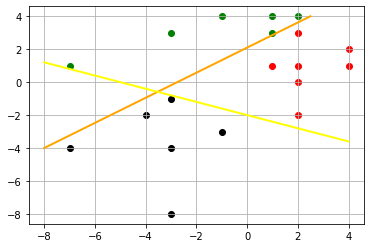

In [34]:
import matplotlib.pyplot as plt



dane = {'green':[], 'black':[], 'red':[]}

for obs in Obserwacja.ekstencja:
    if obs.oczekiwana1 == 0 and obs.oczekiwana2 == 1:
        dane['green'].append([obs.x, obs.y])
    if obs.oczekiwana1 == 0 and obs.oczekiwana2 == -1:
        dane['black'].append([obs.x, obs.y])
    if obs.oczekiwana1 == 1 and obs.oczekiwana2 == -1:
        dane['red'].append([obs.x, obs.y])

plt.scatter([ x[0] for x in dane['green']], [ y[1] for y in dane['green']], color='green')
plt.scatter([ x[0] for x in dane['black']], [ y[1] for y in dane['black']], color='black')
plt.scatter([ x[0] for x in dane['red']], [ y[1] for y in dane['red']], color='red')



plt.grid()
plt.show()